 <font color='blue'><h2> 1-DataFrame </h2></font>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../data/allocine_gold.csv')

## 2-Entrées dans les périodes de vacances

In [6]:
# Utiliser groupby() pour regrouper le DataFrame par la colonne 'vacances' et calculer la moyenne de 'entree_1ere_semaine'
moyenne_par_vacances = df.groupby('vacances')['Entrees_1ere_semaine'].mean()

# Afficher la moyenne par vacances
print(moyenne_par_vacances)


vacances
False    141828.250170
True     175693.873434
Name: Entrees_1ere_semaine, dtype: float64


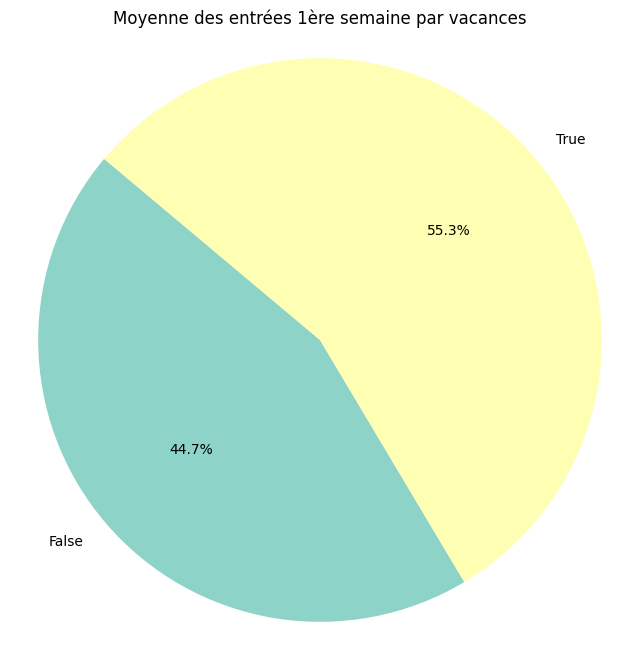

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Créer un DataFrame à partir du résultat
df_moyennes = moyenne_par_vacances.reset_index()

# Définir les données pour le pie chart
valeurs = df_moyennes['Entrees_1ere_semaine']
labels = df_moyennes['vacances']
couleurs = plt.cm.Set3.colors  # Vous pouvez changer les couleurs ici en utilisant d'autres palettes

# Créer le pie chart
plt.figure(figsize=(8, 8))  # Réglez la taille du diagramme en fonction de vos préférences
plt.pie(valeurs, labels=labels, colors=couleurs, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Permet de s'assurer que le diagramme est circulaire
plt.title('Moyenne des entrées 1ère semaine par vacances')
plt.show()



 <font color='blue'><h2> 3-Entrées et durées </h2></font>


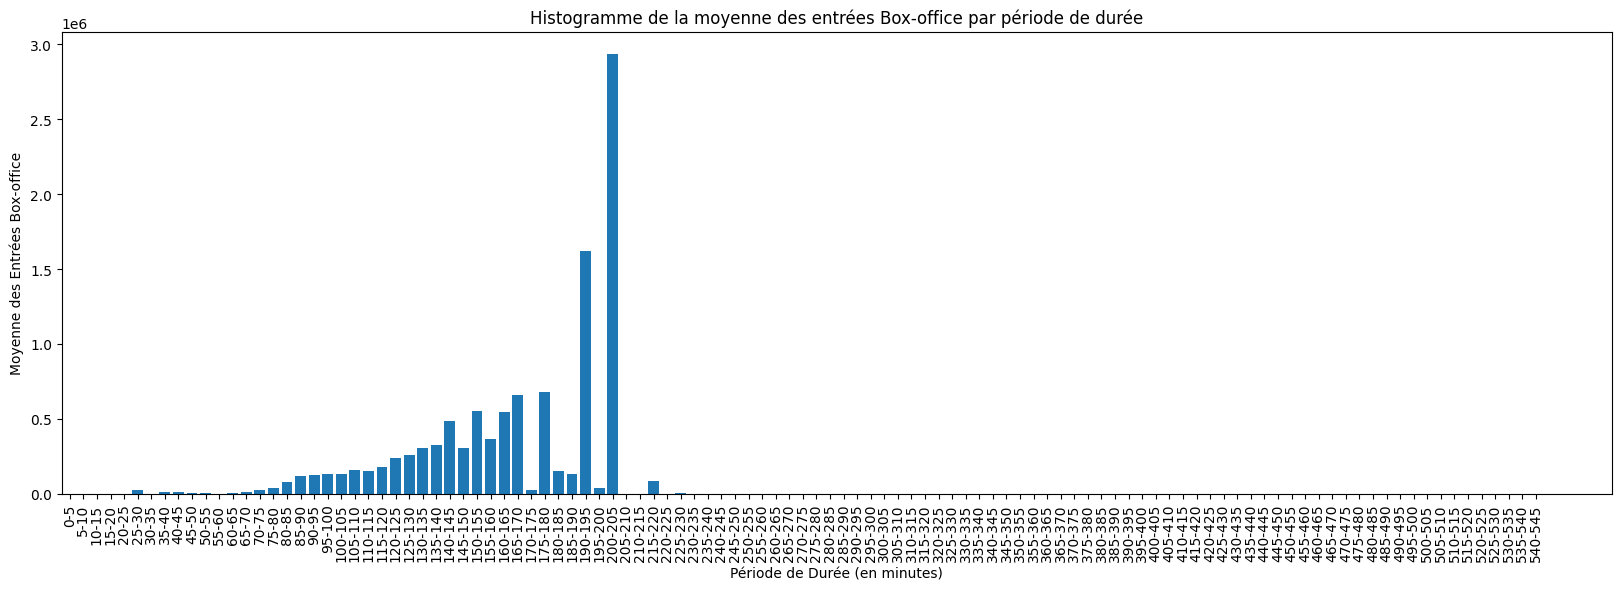

In [10]:
# Créez des bins de largeur 5 pour la colonne 'duree'
bins = list(range(df['duree'].min(), df['duree'].max() + 6, 5))
labels = [f"{i}-{i+5}" for i in bins[:-1]]  # Créez des labels pour chaque bin

# Ajoutez une nouvelle colonne indiquant la période de durée à laquelle chaque film appartient
df['periode_duree'] = pd.cut(df['duree'], bins=bins, labels=labels)

# Calculez la moyenne des entrées 'box_office' pour chaque groupe de films basé sur la colonne 'periode_duree'
moyennes_par_periode = df.groupby('periode_duree')['Entrees_1ere_semaine'].mean()

# Créer l'histogramme à partir des périodes de durée et de leurs moyennes d'entrées 'box_office'
plt.figure(figsize=(20, 6))  # Réglez la taille du graphique en fonction de vos préférences
plt.bar(moyennes_par_periode.index, moyennes_par_periode.values)
plt.xlabel('Période de Durée (en minutes)')
plt.ylabel('Moyenne des Entrées Box-office')
plt.title('Histogramme de la moyenne des entrées Box-office par période de durée')
plt.xticks(rotation=90)  # Inclinez les étiquettes pour les rendre lisibles
plt.show()



 <font color='blue'><h2> 4-Distribution normale nombre des fimes par durée </h2></font>


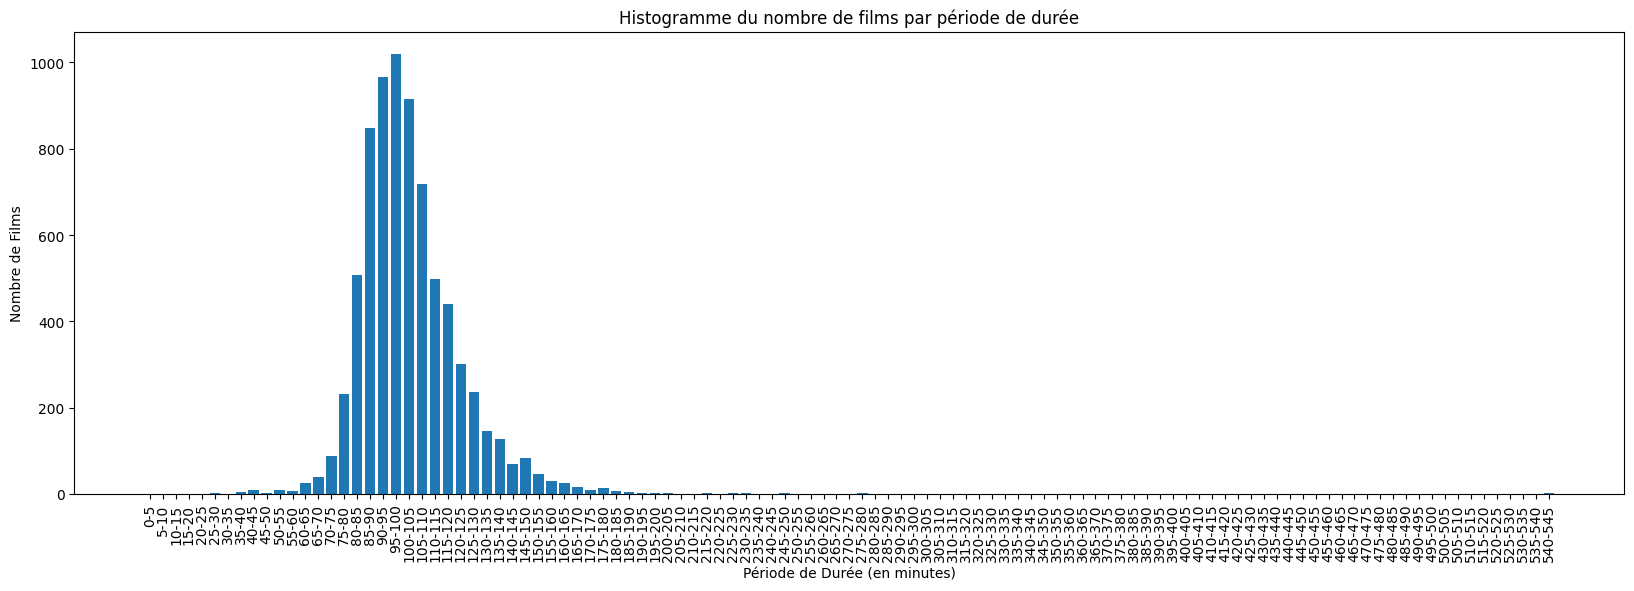

In [12]:
# Créez des bins de largeur 5 pour la colonne 'duree'
bins = list(range(df['duree'].min(), df['duree'].max() + 6, 5))
labels = [f"{i}-{i+5}" for i in bins[:-1]]  # Créez des labels pour chaque bin

# Ajoutez une nouvelle colonne indiquant la période de durée à laquelle chaque film appartient
df['periode_duree'] = pd.cut(df['duree'], bins=bins, labels=labels)

# Comptez le nombre de films dans chaque bin de durée
nombre_films_par_periode = df['periode_duree'].value_counts().sort_index()

# Créer l'histogramme à partir du nombre de films dans chaque bin de durée
plt.figure(figsize=(20, 6))  # Réglez la taille du graphique en fonction de vos préférences
plt.bar(nombre_films_par_periode.index, nombre_films_par_periode.values)
plt.xlabel('Période de Durée (en minutes)')
plt.ylabel('Nombre de Films')
plt.title('Histogramme du nombre de films par période de durée')
plt.xticks(rotation=90)  # Inclinez les étiquettes pour les rendre lisibles
plt.show()
